In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()


In [0]:
xs = iris['data']
ys = iris['target'].reshape(-1,1)
ys_name = iris['target_names']
#print(xs)
print(ys.shape)
print(xs.shape)
xs = (xs - xs.min(axis=0)) / ((xs.max(axis=0) - xs.min(axis=0)))


(150, 1)
(150, 4)


acc1 :  1.0
acc2 :  0.7
acc3 :  0.9666666666666667
total_acc :  0.8888888888888888


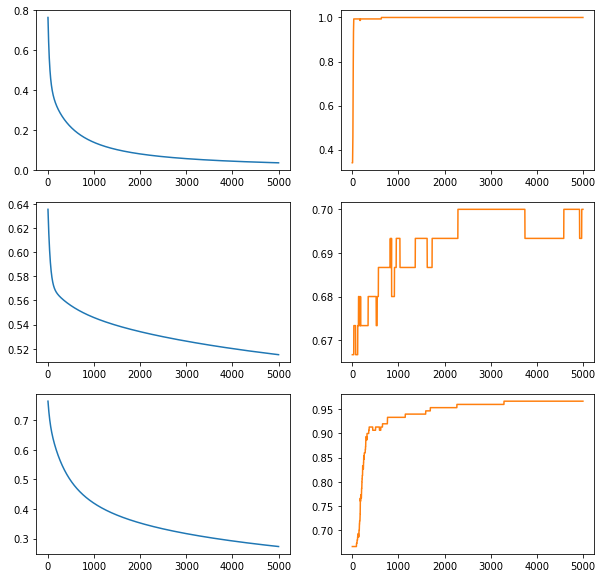

In [0]:
lr = 0.05
epoch = 5000

loss1_hist = []
loss2_hist = []
loss3_hist = []

acc1_hist = []
acc2_hist = []
acc3_hist = []

tf.reset_default_graph()

#---------------------------------------------1---------------------


x = tf.placeholder(dtype = tf.float32, shape = (None, 4),name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None, 1), name = 'y')

y_1 = tf.cast(tf.equal(y,tf.zeros_like(y)),dtype = tf.float32,name = 'y1')
y_2 = tf.cast(tf.equal(y,tf.ones_like(y)),dtype = tf.float32, name = 'y2')
y_3 = tf.cast(tf.equal(y,tf.ones_like(y)+1),dtype = tf.float32, name = 'y3')


w = tf.Variable(tf.random_normal(shape = [4,1],dtype = tf.float32),name = 'w')
b = tf.Variable(tf.zeros(shape = [4]))

logit = tf.matmul(x,w) + b
pred = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y_1*tf.log(pred+1e-8) + (1-y_1)*tf.log(1-pred+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred),y_1),dtype = tf.float32))


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_,acc_ = sess.run([train_op,loss,acc], feed_dict = {x : xs, y: ys})
  loss1_hist.append(loss_)
  acc1_hist.append(acc_)
  
pred_tf, y_1_tf = sess.run([pred,y_1],feed_dict = {x : xs, y: ys})

acc1 = np.mean(np.equal(pred_tf > 0.5,y_1_tf))
print("acc1 : ", acc1)

#---------------------------------------------2---------------------

x = tf.placeholder(dtype = tf.float32, shape = (None, 4),name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None, 1), name = 'y')

y_1 = tf.cast(tf.equal(y,tf.zeros_like(y)),dtype = tf.float32,name = 'y1')
y_2 = tf.cast(tf.equal(y,tf.ones_like(y)),dtype = tf.float32, name = 'y2')
y_3 = tf.cast(tf.equal(y,tf.ones_like(y)+1),dtype = tf.float32, name = 'y3')


w = tf.Variable(tf.random_normal(shape = [4,1],dtype = tf.float32),name = 'w')
b = tf.Variable(tf.zeros(shape = [4]))

logit = tf.matmul(x,w) + b
pred = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y_2*tf.log(pred+1e-8) + (1-y_2)*tf.log(1-pred+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred),y_2),dtype = tf.float32))


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_,acc_ = sess.run([train_op,loss,acc], feed_dict = {x : xs, y: ys})
  loss2_hist.append(loss_)
  acc2_hist.append(acc_)

pred_tf, y_2_tf = sess.run([pred,y_2],feed_dict = {x : xs, y: ys})

acc2 = np.mean(np.equal(pred_tf > 0.5,y_2_tf))
print("acc2 : ",acc2)

#---------------------------------------------3---------------------


x = tf.placeholder(dtype = tf.float32, shape = (None, 4),name = 'x')
y = tf.placeholder(dtype = tf.float32, shape = (None, 1), name = 'y')

y_1 = tf.cast(tf.equal(y,tf.zeros_like(y)),dtype = tf.float32,name = 'y1')
y_2 = tf.cast(tf.equal(y,tf.ones_like(y)),dtype = tf.float32, name = 'y2')
y_3 = tf.cast(tf.equal(y,tf.ones_like(y)+1),dtype = tf.float32, name = 'y3')


w = tf.Variable(tf.random_normal(shape = [4,1],dtype = tf.float32),name = 'w')
b = tf.Variable(tf.zeros(shape = [4]))

logit = tf.matmul(x,w) + b
pred = tf.nn.sigmoid(logit)

loss = -tf.reduce_mean(y_3*tf.log(pred+1e-8) + (1-y_3)*tf.log(1-pred+1e-8))
train_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

acc = tf.reduce_mean(tf.cast(tf.equal(tf.round(pred),y_3),dtype = tf.float32))


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(epoch):
  _,loss_,acc_ = sess.run([train_op,loss,acc], feed_dict = {x : xs, y: ys})
  loss3_hist.append(loss_)
  acc3_hist.append(acc_)
  
pred_tf, y_3_tf = sess.run([pred,y_3],feed_dict = {x : xs, y: ys})

acc3 = np.mean(np.equal(pred_tf > 0.5,y_3_tf))
print("acc3 : ",acc3)
print("total_acc : ",np.mean([acc1,acc2,acc3]))

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(3,2,1)
ax.plot(loss1_hist)
ax = fig.add_subplot(3,2,2)
ax.plot(acc1_hist, "C1")
ax = fig.add_subplot(3,2,3)
ax.plot(loss2_hist)
ax = fig.add_subplot(3,2,4)
ax.plot(acc2_hist,"C1")
ax = fig.add_subplot(3,2,5)
ax.plot(loss3_hist)
ax = fig.add_subplot(3,2,6)
ax.plot(acc3_hist,"C1")